In [27]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [92]:
#6/20 - 7/20
num_page =[]
for i in range(580356,580993):
    num_page.append(i)

In [94]:
num_page[0]

580356

In [95]:
url = 'https://www1.president.go.kr/petitions/'

In [100]:

urls = []
for i in range(len(num_page)):
    url = 'https://www1.president.go.kr/petitions/'+str(num_page[i])
    urls.append(url)

In [105]:
a =[]
for i in urls:
    page = urlopen(i)

    document = page.read()
    soup = BeautifulSoup(document, 'html5lib')
    div_tag=soup.find_all('div',class_='View_write')
    
    for title in div_tag:
        a.append(title.get_text())

In [106]:
a

['\n\t\t\t\t\t\t\t\t\t\t대통령님 안녕하세요 \n저는 5살 아이를 키우고있는 엄마입니다..\n저는 요번에 정말 억울한 일을 경험했습니다\n 아이가 4월 중순쯤 유치원 입학을하고 1주 지나고부터 울고 불며 등원거부를 하여 아이와 대화를 나누어보니 선생님이 자꾸 때린다 말하였습니다....그래서 유치원 원장님께 cctv 열람신청을 하고 열람 하였더니 원생활 14일 한것중 처음부터 끝까지 볼수있는 날은 퇴소하기 전 1-2일 밖에 안되었고 나머지 날들은 구간구간이 인의적으로 삭제된 것처럼 오전10시 영상이 잘나오다 갑자기 시간이 오전12시로 점프...이렇게 중간중간이 다 삭제되어 있었습니다..\n선생님의 학대에 대한 아이의 구체적인 말들과 인위적으로 편집된것 같은 cctv영상을 보고 전 아동보호전문기관에 \n5월 11일 신고를 하였고 아동 보호전문기관 에서는 경찰과 함께 5월 17일날 유치원에 방문하였습니다.\n하지만 원장님께선 cctv가 일주일밖에 저장되지 않는다며\n아이가 퇴소하고난 5월10일 이후부터 볼수있다 말씀하셨고 결정적인 증거가될 cctv영상이 없다는 이유로\n경찰은 수사자체를 안한다하고 있습니다..\n저는 분명 유치원에 cctv열람신청 하고 보러갔을때 2주전 것도 저장되어 있는것을 보았는데 .. 원장님의 거짓말과 \n영상삭제로 인해 수사가 안된다 합니다.\n정말 아이에게 학대를 하지 않았다면 이렇게까지 거짓을말\n하고 cctv까지 손댈 이유가 있을까 생각이 들수 밖에 없는 상황이라  경찰에 고소를 하려 법무사에 전화해보니 경찰에 고소장을 내도 경찰이 cctv관련해서 삭제된 영상을 복구하거나 원본을 찾는 다거나 하지 않는다고 말씀 들었습니다.\n그래서 고소잘못하면 역고소 당하는경우가 비일비재 하다고.. 일반인인 저로써는 cctv를 복구하거나 그럴 권한 자체가 없기에 사법기관인 경찰에게 밖에 말할수 없는데 \n경찰도 승진이걸린 큰사건도 아니고 아이의 증언밖에 없다는 이유로 아무것도 해주지 않습니다..\n 그럼 엄마인 저는 우리아이를 위해 어

In [109]:
import pandas as pd
df = pd.DataFrame(a)

df.to_csv("filename.csv", mode='w')

In [110]:
import os

In [113]:
os.getcwd()

'C:\\Users\\1pc'

In [121]:
import os
from wordcloud import WordCloud
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk import Text
from matplotlib import font_manager, rc
from konlpy.tag import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [118]:
new = ','.join(a)

In [119]:
h = Hannanum()
nouns = h.nouns(new)

In [125]:
retokenize = RegexpTokenizer('[\w]+')
txt = retokenize.tokenize(new)
new_f = [i for i in txt if len(i)>1]

words = Text(new_f, name='issue')

In [131]:
len(new_f)

192714

In [128]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [129]:
words.vocab()

FreqDist({'있습니다': 1105, '있는': 893, '합니다': 629, '저는': 496, '하는': 468, '하고': 459, '대한': 459, '없는': 365, '그리고': 353, '국민': 351, ...})

(0.0, 1.0, 0.0, 1.0)

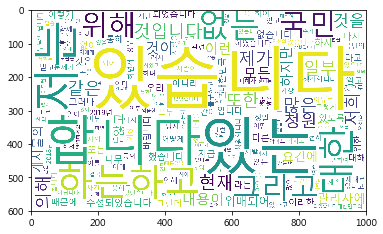

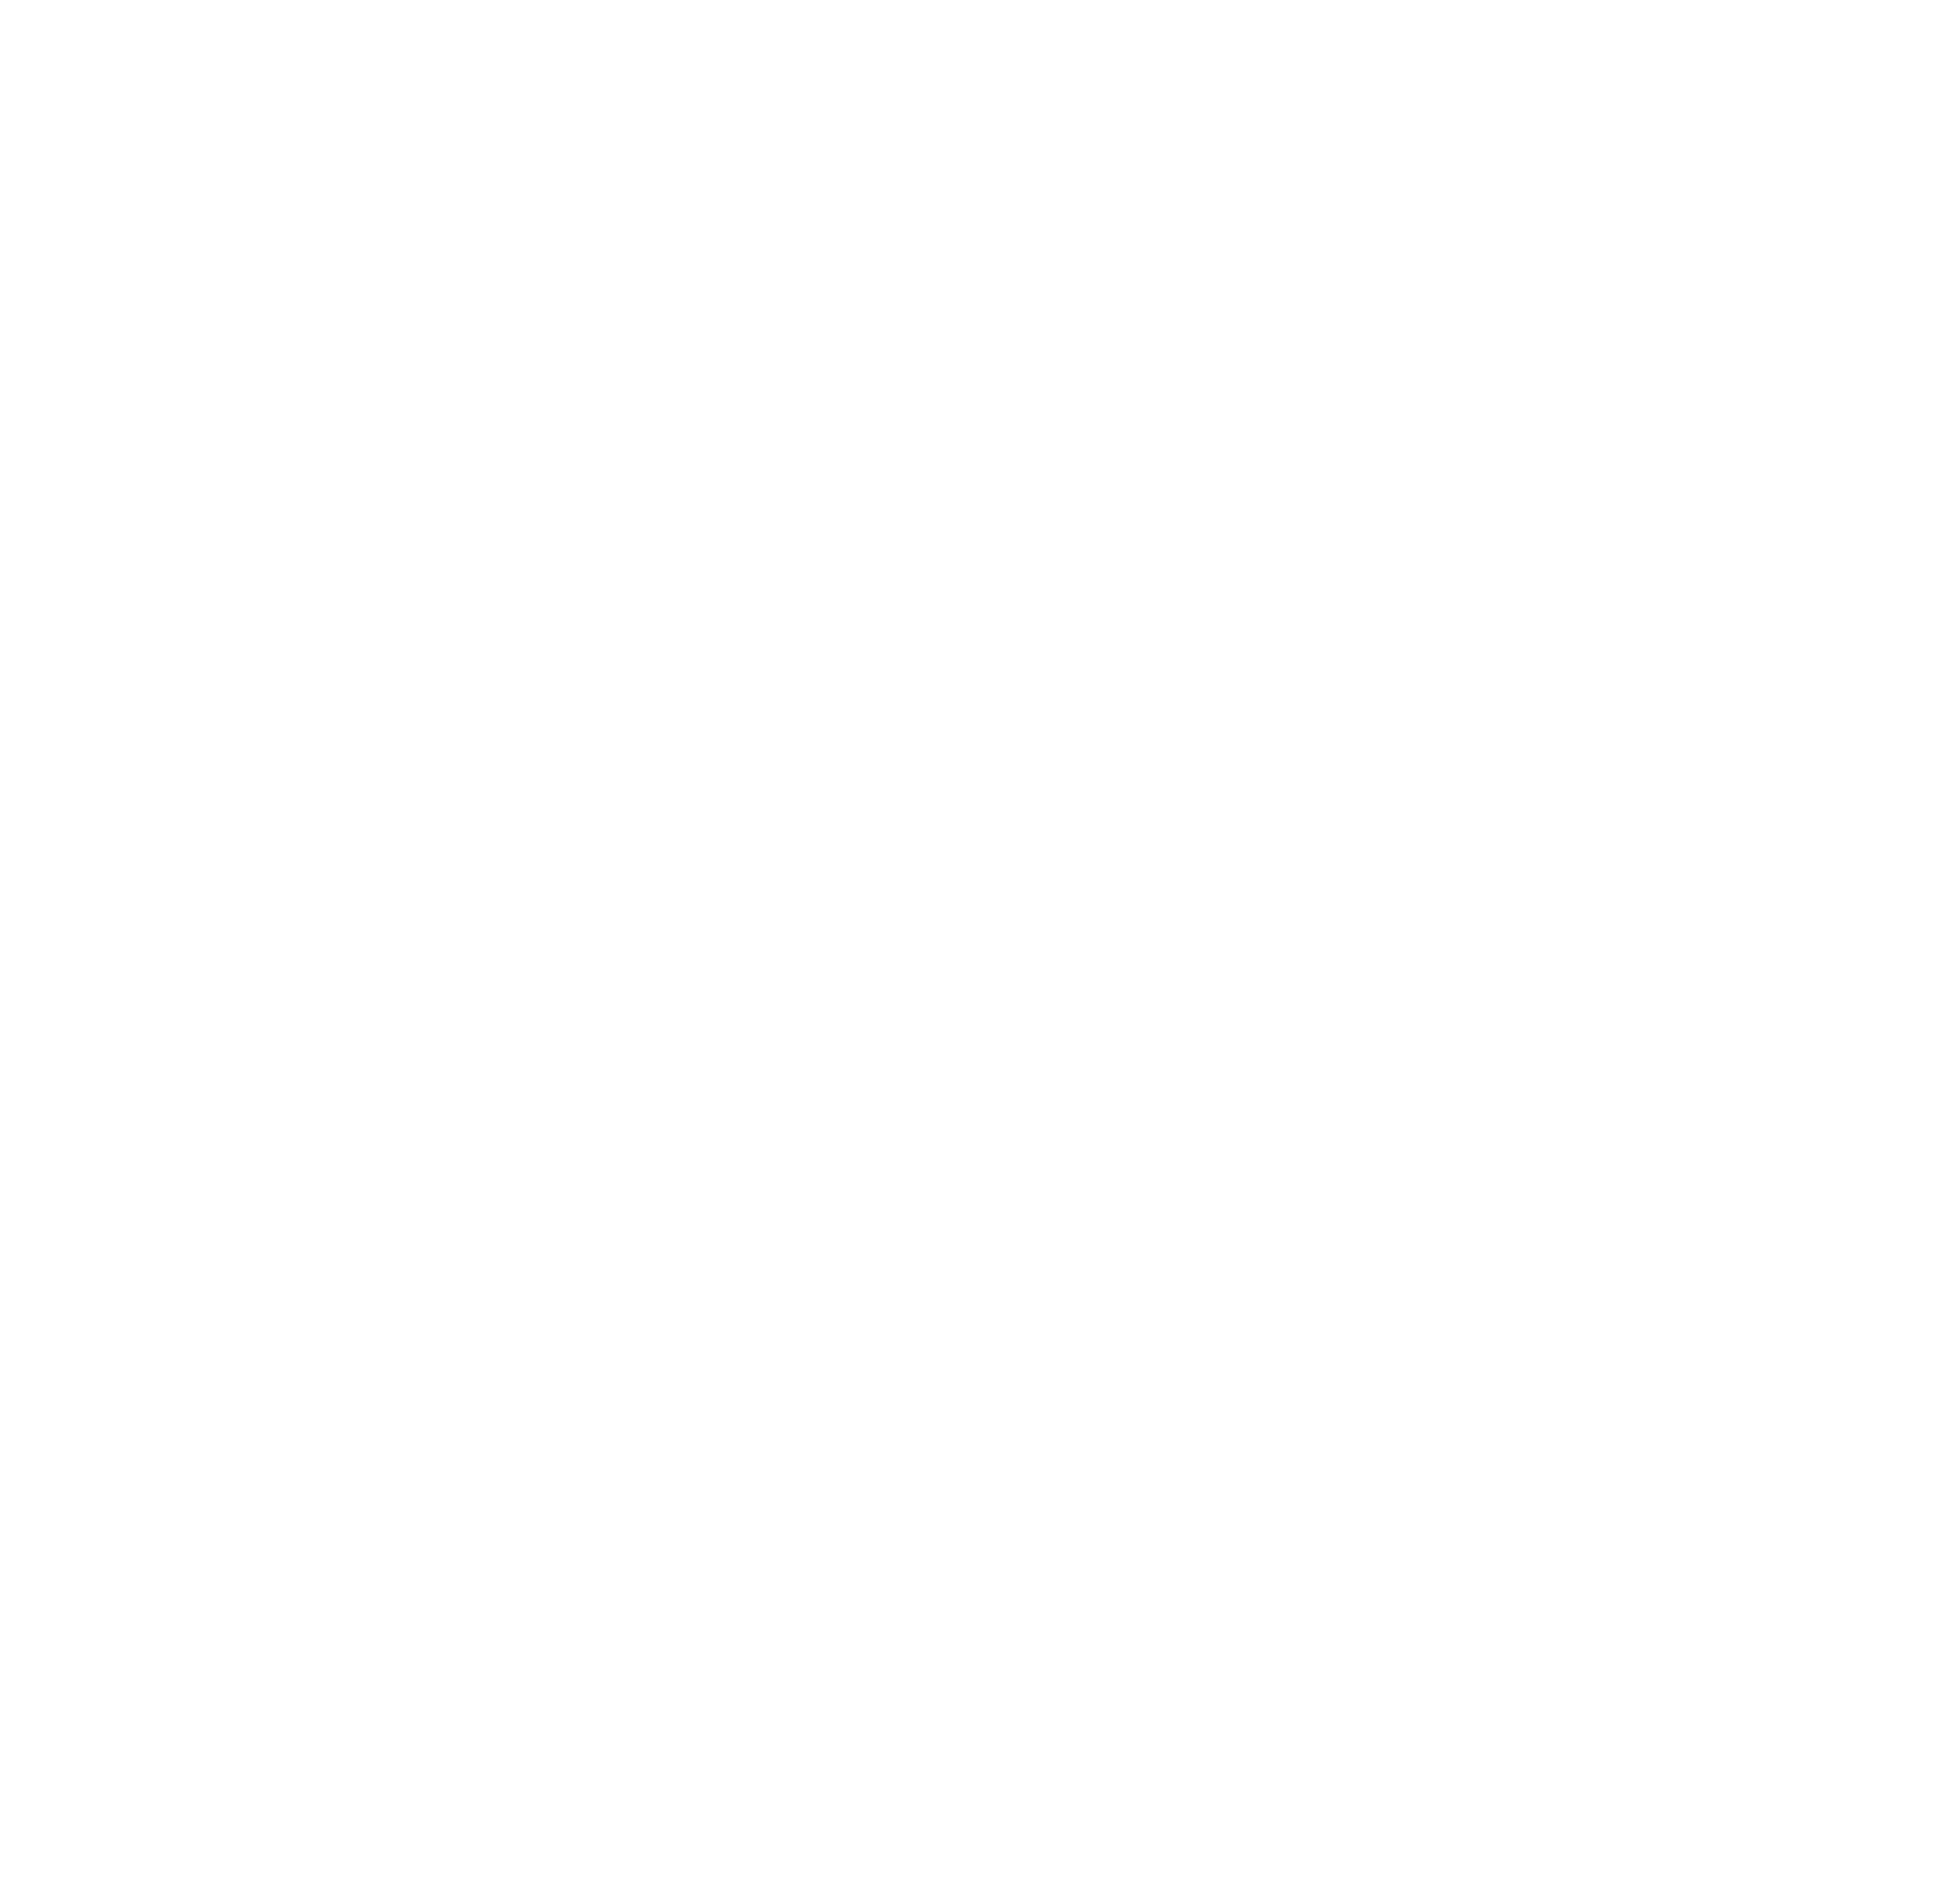

In [130]:
wc = WordCloud(width=1000, height=600, background_color="white", font_path="c:/Windows/Fonts/malgun.ttf",random_state=0)
plt.imshow(wc.generate_from_frequencies(words.vocab()))
plt.figure(figsize=(100,100))
plt.axis("off")